<a href="https://colab.research.google.com/github/Boris1001/Genetic_al_storage_let/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Загружаем библиотеки

from tensorflow.keras.preprocessing.text import Tokenizer          # Керасавский токенайзер для получения букв в порядке частоты их использования
import re                                                          # модуль re
import random                                                      # модуль random
import matplotlib.pyplot as plt                                    # Импортируем модуль pyplot библиотеки matplotlib
import matplotlib.colors as colors                                 # Импортируем модуль colors библиотеки matplotlib

# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
%matplotlib inline

In [ ]:
# создаём переменную с исходным текстом

poem ='''Во глубине сибирских руд
Храните гордое терпенье,
Не пропадет ваш скорбный труд
И дум высокое стремленье.'''

#Функции

In [ ]:
# Функция предобработки данных

def parsing(poem):
    poem = "".join(re.split("[^а-яА-Я ]*", poem.lower()))         # оставляем только буквы кириллицы в нижнем регистре
    words = poem.split(' ')                                       # получаем отдельные слова в списке
    print('Слова: ', words)
    print(len(words), 'шт')


#    letters = set(poem)                                          # получаем буквы из которых состоит четверостишье
#    letters.discard(' ')                                         # удаляем пробел
#    print(letters)
#    print(len(letters))

    # Керасавский токенайзер для получения букв в порядке частоты их использования

    tokenizer = Tokenizer(lower=True, split=' ', char_level=True)
    tokenizer.fit_on_texts(poem)
    items = list(tokenizer.word_index.items())

    letters_tok = []    # переменная для букв в порядке частоты упомининия от большего к меньшему в форме списка
    for i in items[1:]:
      letters_tok.append(i[0])
    print()
    print('Буквы: ', letters_tok)
    print(len(letters_tok), 'шт')

    return words, letters_tok


In [ ]:
'''
    Функция расчёта дневного заработка, возвращает доход в рублях за день
        Входные параметры:
    word - слово из заказа в формате строки
    material - база букв в формате списка
'''

def daily_profit(word, material):
  profit = 0
  express = 1
  letters = material.copy()
  counter = len(word)
  for let in word:
      if let in letters:
          counter -= 1
          letters.remove(let)
      else:
          if express == 1:
              express -= 1
              counter -= 1
  if counter > 0:
      profit -= 10
  elif counter == 0:
      profit += 40
      if express == 0:
        profit -= 2
  return profit

In [ ]:
'''
    Функция расчёта всего заработка, возвращает доход в рублях
            Входные параметры:
    words - слова из четверостишья в формате списка
    material - база букв в формате списка
'''

def profit(words, material):
    result = 0
    letter_rental = len(material)
    for word in words:
        result -= letter_rental
        receipt = daily_profit(word, material)
        result += receipt
    return result

In [ ]:
'''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
'''
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    newpopul = [] # Двумерный массив для новой популяции
    sval = sorted(val, reverse= True) # Сортируем зачения в val в зависимости от параметра reverse
    for i in range(nsurv): # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i]) # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index]) # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval # Возвращаем новую популяцию (из nsurv элементов) и сортированный список

In [ ]:
'''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
'''
def getParents(
        curr_popul,
        nsurv
        ):
    indexp1 = random.randint(0, nsurv - 1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1) # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1

    botp1 = curr_popul[indexp1] # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2] # Получаем второго бота-родителя по indexp2
    return botp1, botp2

In [ ]:
'''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
'''
def crossPointFrom2Parents(
        botp1,
        botp2,
        j
        ):
    pindex = random.random() # Получаем случайное число в диапазоне от 0 до 1

    # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x

In [ ]:

# Функция получения популяции
'''
      Входные параметры:
    n = 200       Общее число ботов
    nsurv = 20    Количество выживших (столько лучших переходит в новую популяцию)
    epohs = 2500  количество эпох
    mut = 0.4     коэфициент мутаций
'''

def get_popul(letters, n= 200, nsurv= 20, epohs= 2500, mut= 0.4,):
  plotmeanval = [] # сюда будут заносится значения для графика по среднему значению
  plotminval = [] # сюда будут заносится значения для графика по минимальному значению
  nnew = n-nsurv # Количество новых (столько новых ботов создается)
  best_results = {}

  for l in range(17, 24):                           # наилучшие результаты тестового заданияв этом диапазоне
#  for l in range(len(words)//2, len(words)*2):     # Работаем в диапазоне от 50 до 200 % от количества букв в тексте
    popul = []           # Популяция
    val = []             # Значения ботов

    for i in range(n):   # Проходим по всей длине популяции
      popul.append([])   # Создаем пустого бота
      for j in range(l): # Проходим по всей длине бота

        # В каждый компонент бота записываем рандомное значение буквы из списка
        popul[i].append(letters[random.randint(0, len(letters) - 1)])

    for it in range(epohs):      # Проходим по всем эпохам
      if (it == 500):            # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1
      if (it == 1000):           # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05

      val = []               # Создаем пустой список для значений заработков ботов
      for i in range(n):     # Проходим по всей популяции
        popul.append([])     # Создаем пустого бота

        bot = popul[i]       # Берем очередного бота

        bot_profit = 0       # Обнуляем заработок i-го бота
        bot_profit = profit(words, bot)     # записываем результат функции profit
        val.append(bot_profit)              # Добавляем в val значение заработка для i-го бота
        best_results[l] = max(val)

      newpopul, sval = getSurvPopul(popul, val, nsurv, 1)  # Получаем новую популяцию и сортированный список значнией
      print(it, " ", sval[0:20])                           # Выводим среднее значение 20 лучших ботов
      plotmeanval.append(sum(val) / len(val)) # Добавляем среднее значение в список
      plotminval.append(sval[0]) # Добавляем минимальное значение в список

      for i in range(nnew):                                # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv)         # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = []                                        # Массив для нового бота

        for j in range(l):                                 # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j)    # Получаем значение для j-ого компонента бота

           # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = letters[random.randint(0, len(letters)-1)]

            newbot.append(x)                               # Добавляем новое значение в бота
        newpopul.append(newbot)                            # Добавляем бота в новую популяцию
      popul = newpopul                                     # Записываем в popul новую посчитанную популяцию
  best_bot = popul[0]
  return val, best_bot, best_results, plotmeanval, plotminval     # возвращаем доход, лучший список букв, словарь с лучшими результатами и данных для визуализации


# Получение результатов

In [ ]:
words, letters = parsing(poem)                                  # Получаем слова и буквы из которых состоит четверостишье

Слова:  ['во', 'глубине', 'сибирских', 'руд', 'храните', 'гордое', 'терпенье', 'не', 'пропадет', 'ваш', 'скорбный', 'труд', 'и', 'дум', 'высокое', 'стремленье']
16 шт

Буквы:  ['е', 'р', 'о', 'и', 'н', 'с', 'д', 'т', 'у', 'в', 'б', 'к', 'а', 'п', 'г', 'л', 'х', 'ь', 'ы', 'м', 'ш', 'й']
22 шт


In [ ]:
# Функция получения популяции
'''
      Входные параметры:
    n = 200       Общее число ботов
    nsurv = 20    Количество выживших (столько лучших переходит в новую популяцию)
    epohs = 2500  количество эпох
    mut = 0.4     коэфициент мутаций
'''

val, best_bot, best_results, plotmeanval, plotminval = get_popul(letters, epohs= 1500)      # получаем доход, список букв и словарь с лучшими результатами

print()
print(best_results)
print()
print('Значения лучшего бота:', best_bot)                          # Выводим значения бота

Выходные данные были обрезаны до нескольких последних строк (5000).
1004   [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254]
1005   [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254]
1006   [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254]
1007   [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254]
1008   [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254]
1009   [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254]
1010   [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254]
1011   [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254]
1012   [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 

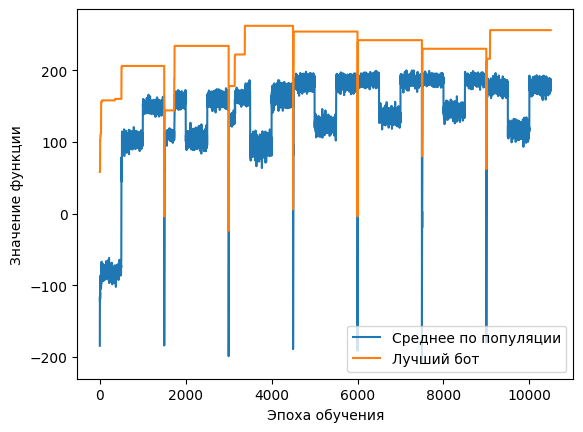

In [ ]:
# построение графиков
plt.plot(plotmeanval, label='Среднее по популяции')
plt.plot(plotminval, label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
# Вычисляем среднюю дневную прибыль

av_day_profit = int((max(val)/len(words)))
print('Cредняя дневная прибыль при таком наборе букв на складе: ' + str(av_day_profit) + ' руб.')

Cредняя дневная прибыль при таком наборе букв на складе: 16 руб.


In [ ]:
result={}
for i in best_bot:
    result[i] = result.get(i, 0) + 1

In [ ]:
result = dict(sorted(result.items(), key=lambda item: item[1], reverse= True))  #Сортируем чтоб было красивенько

#Ответ

In [ ]:
# Вычисляем среднюю дневную прибыль

av_day_profit = int((max(val)/len(words)))
print('Cредняя дневная прибыль при таком наборе букв на складе: ' + str(av_day_profit) + ' руб.')

Cредняя дневная прибыль при таком наборе букв на складе: 16 руб.


In [ ]:
result

{'е': 2,
 'и': 2,
 'с': 2,
 'м': 1,
 'ь': 1,
 'в': 1,
 'л': 1,
 'б': 1,
 'р': 1,
 'п': 1,
 'д': 1,
 'а': 1,
 'у': 1,
 'о': 1,
 'н': 1,
 'т': 1,
 'ы': 1,
 'г': 1,
 'х': 1,
 'к': 1}

#Тесты

In [ ]:
quatrain_1 ='''О мирный селянин! в твоем жилище нет
Ни злата, ни сребра; но ты счастлив стократно:
С любовью, с дружбой ты проводишь дни приятно,
А в городе и шум, и пыль, и стук карет!'''

In [ ]:
words, letters = parsing(quatrain_1)

Слова:  ['о', 'мирный', 'селянин', 'в', 'твоем', 'жилище', 'нетни', 'злата', 'ни', 'сребра', 'но', 'ты', 'счастлив', 'стократнос', 'любовью', 'с', 'дружбой', 'ты', 'проводишь', 'дни', 'приятноа', 'в', 'городе', 'и', 'шум', 'и', 'пыль', 'и', 'стук', 'карет']
30 шт

Буквы:  ['и', 'о', 'т', 'н', 'р', 'с', 'е', 'а', 'л', 'в', 'ы', 'д', 'м', 'б', 'к', 'ь', 'у', 'п', 'й', 'я', 'ж', 'ю', 'ш', 'щ', 'з', 'ч', 'г']
27 шт


In [ ]:
val, best_bot, best_results, plotmeanval, plotminval = get_popul(letters, n= 100, nsurv= 20, epohs= 500)      # получаем доход, список букв и словарь с лучшими результатам
print()
print(best_results)
print()
print('Значения лучшего бота:', best_bot)                          # Выводим значения бота

0   [22, -22, -28, -32, -34, -72, -74, -76, -88, -90, -120, -122, -124, -124, -124, -126, -130, -132, -134, -170]
1   [116, 80, 72, 68, 22, 10, -22, -26, -28, -32, -32, -34, -36, -72, -72, -74, -76, -78, -78, -78]
2   [216, 116, 80, 72, 68, 28, 24, 22, 22, 10, -22, -24, -26, -26, -28, -28, -32, -32, -32, -32]
3   [216, 116, 80, 72, 72, 70, 68, 28, 24, 24, 22, 22, 22, 20, 18, 10, -22, -24, -24, -24]
4   [216, 116, 80, 78, 72, 72, 70, 68, 28, 28, 28, 26, 24, 24, 22, 22, 22, 22, 20, 18]
5   [216, 122, 118, 116, 80, 78, 72, 72, 72, 70, 68, 66, 30, 28, 28, 28, 26, 26, 24, 24]
6   [216, 174, 122, 118, 116, 80, 78, 72, 72, 72, 70, 70, 68, 66, 30, 28, 28, 28, 26, 26]
7   [216, 174, 124, 122, 118, 116, 80, 78, 72, 72, 72, 70, 70, 68, 66, 30, 28, 28, 28, 28]
8   [216, 174, 174, 124, 122, 118, 116, 80, 78, 74, 72, 72, 72, 72, 70, 70, 68, 68, 66, 30]
9   [216, 174, 174, 124, 122, 118, 116, 80, 78, 74, 72, 72, 72, 72, 72, 70, 70, 68, 68, 68]
10   [216, 174, 174, 124, 122, 118, 116, 80, 78, 74, 72, 

In [ ]:
result = dict(sorted(result.items(), key=lambda item: item[1], reverse= True))
print(result)

{'е': 2, 'и': 2, 'с': 2, 'м': 1, 'ь': 1, 'в': 1, 'л': 1, 'б': 1, 'р': 1, 'п': 1, 'д': 1, 'а': 1, 'у': 1, 'о': 1, 'н': 1, 'т': 1, 'ы': 1, 'г': 1, 'х': 1, 'к': 1}


In [ ]:
result

{'е': 2,
 'и': 2,
 'с': 2,
 'м': 1,
 'ь': 1,
 'в': 1,
 'л': 1,
 'б': 1,
 'р': 1,
 'п': 1,
 'д': 1,
 'а': 1,
 'у': 1,
 'о': 1,
 'н': 1,
 'т': 1,
 'ы': 1,
 'г': 1,
 'х': 1,
 'к': 1}

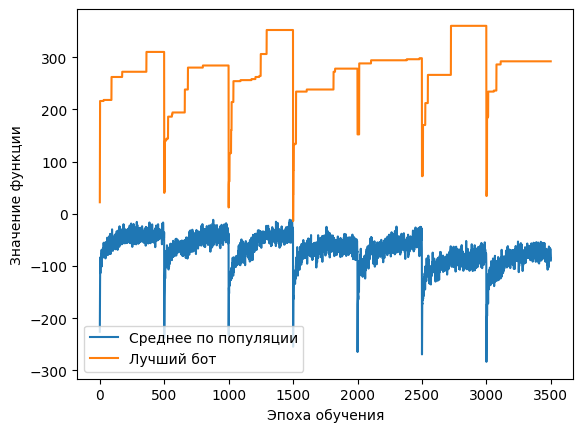

In [ ]:
# построение графиков
plt.plot(plotmeanval,
         label='Среднее по популяции')
plt.plot(plotminval,
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()